# 可视化探索adult数据集

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. 读入数据

In [3]:
column_list = ['age', 'job_catagory', 'final_weight',
              'education', 'education_time', 'marry', 'job',
              'family', 'race', 'gender', 'in', 'out',
              'work_time', 'country', 'salary']
df = pd.read_csv("adult.csv",names=column_list)
print(df[:5])

   age job_catagory  final_weight      education  education_time  \
0   25      Private        226802           11th               7   
1   38      Private         89814        HS-grad               9   
2   28    Local-gov        336951     Assoc-acdm              12   
3   44      Private        160323   Some-college              10   
4   18            ?        103497   Some-college              10   

                 marry                 job      family    race   gender    in  \
0        Never-married   Machine-op-inspct   Own-child   Black     Male     0   
1   Married-civ-spouse     Farming-fishing     Husband   White     Male     0   
2   Married-civ-spouse     Protective-serv     Husband   White     Male     0   
3   Married-civ-spouse   Machine-op-inspct     Husband   Black     Male  7688   
4        Never-married                   ?   Own-child   White   Female     0   

   out  work_time         country   salary  
0    0         40   United-States   <=50K.  
1    0        

## 2. 分析数据并绘图

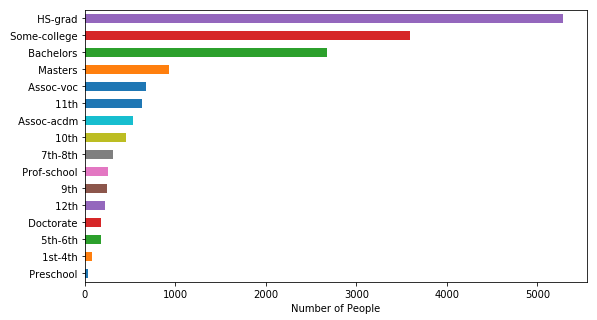

In [34]:
# 统计教育情况
s = df['education']
fig = s.value_counts(ascending=True).plot(kind='barh', figsize=(9, 5))
plt.xlabel('Number of People')
plt.savefig('report/img/education_dis.pdf')
plt.show()

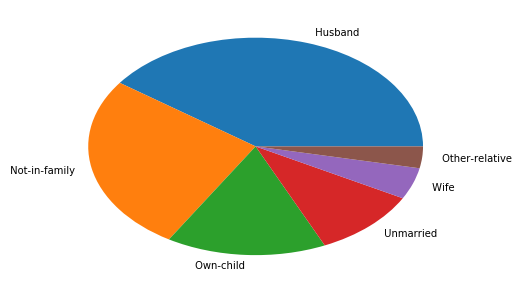

In [39]:
# 统计家庭情况
s = df['family']
fig = s.value_counts().plot(kind='pie', label='', figsize=(7.5, 5))
plt.savefig('report/img/family_dis.pdf')
plt.show()

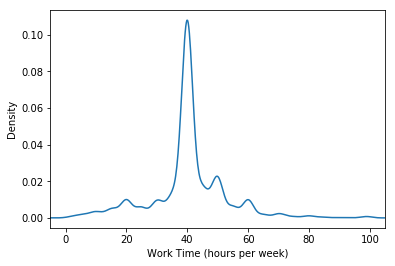

In [40]:
# 统计工作时间
s = df['work_time']
fig = s.plot(kind='kde', label='')
plt.xlim((-5, 105))
plt.xlabel('Work Time (hours per week)')
plt.savefig('report/img/worktime_dis.pdf')
plt.show()

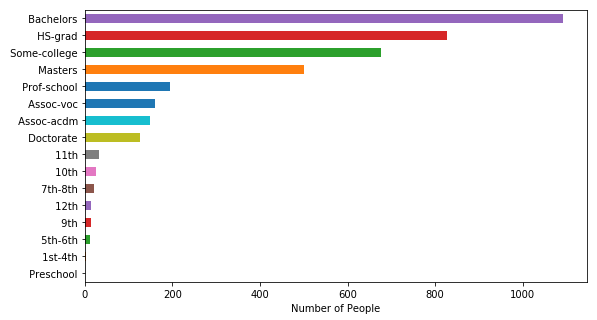

In [4]:
# 收入>50K的教育程度分布
df1 = df.loc[df['salary'] == ' >50K.', ['education']]
s = df1['education']
fig = s.value_counts(ascending=True).plot(kind='barh', figsize=(9, 5))
plt.xlabel('Number of People')
plt.savefig('report/img/education_dis_more50k.pdf')
plt.show()

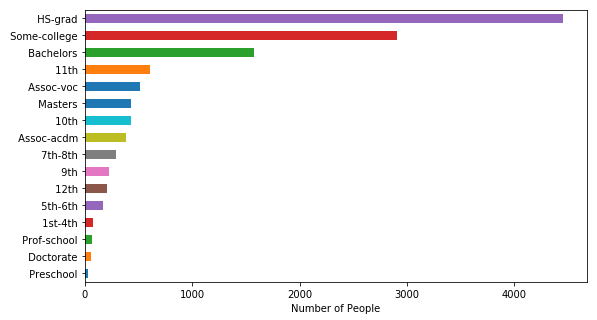

In [7]:
# 收入<=50K的教育程度分布
df1 = df.loc[df['salary'] == ' <=50K.', ['education']]
s = df1['education']
fig = s.value_counts(ascending=True).plot(kind='barh', figsize=(9, 5))
plt.xlabel('Number of People')
plt.savefig('report/img/education_dis_less50k.pdf')
plt.show()

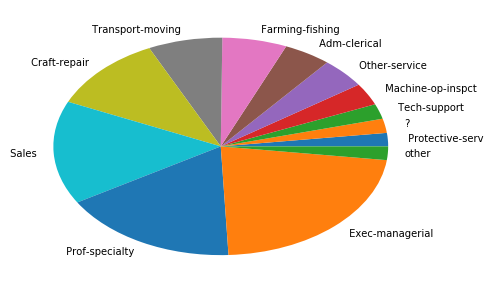

In [44]:
# 每周工作时间>50小时的工作分布
df1 = df.loc[df['work_time'] >= 50, ['job']]
s = df1['job'].value_counts(ascending=True)
# print(s)
s1 = s[:3]
s2 = s[3:]
s = s2.append(pd.Series([s1[0] + s1[1] + s1[2]], index=['other']))
fig = s.plot(kind='pie', label='', figsize=(7.5, 5))
plt.savefig('report/img/job_dis.pdf')
plt.show()

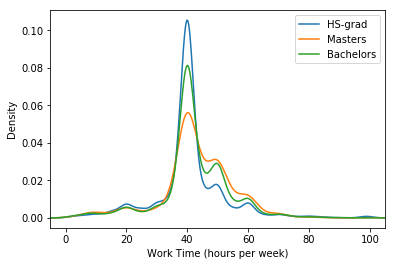

In [45]:
# HS-grad和Master的工作时间比较
l1 = df.loc[df['education'] == ' HS-grad', ['work_time']]['work_time']
l2 = df.loc[df['education'] == ' Masters', ['work_time']]['work_time']
l3 = df.loc[df['education'] == ' Bachelors', ['work_time']]['work_time']

plt.xlim((-5, 105))
plt.xlabel('Work Time (hours per week)')
ax1 = l1.plot(kind='kde', label='HS-grad')
ax2 = l2.plot(kind='kde', label='Masters')
ax3 = l3.plot(kind='kde', label='Bachelors')
plt.legend()
plt.savefig('report/img/work_time_com1.pdf')
plt.show()